# ML Nr 2: TMDB Box Office

## Frame the problem and look at the big picture

Dette maskinlæringsprosjektet handler om å utvikle og trene en modell til å predikere samlet inntekt for filmer ved billettkontorer på verdensbasis. Notebooken er strukturert etter disse åtte punktene:
1. Frame the problem and look at the big picture
2. Get the data
3. Explore the data to gain insights
4. Prepare the data to better expose the underlying data patterns to machine learning algorithms
5. Explore many different models and short-list the best ones
6. Fine-tune your models and combine them into a great solution
7. Present your solution
8. Launch, monitor and maintain your system


## Get the data

In [38]:
# Import necesary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import ast

# Automatically reload modules defined in external files
%reload_ext autoreload
%autoreload 2

# Display plots directly in the notebook
%matplotlib inline

In [39]:
# Data gitt i oppgaven
print(os.listdir("../data"))

['sample_submission.csv', 'test.csv', 'train.csv']


In [40]:
# Bruker pandas til å lese filene
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
sampleSubmission = pd.read_csv('../data/sample_submission.csv')

## Explore the data to gain insights

In [41]:
# Se første fem rader i treningssettet
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [42]:
# Se første fem rader i testsettet
test.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [44]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4398 non-null   int64  
 1   belongs_to_collection  877 non-null    object 
 2   budget                 4398 non-null   int64  
 3   genres                 4382 non-null   object 
 4   homepage               1420 non-null   object 
 5   imdb_id                4398 non-null   object 
 6   original_language      4398 non-null   object 
 7   original_title         4398 non-null   object 
 8   overview               4384 non-null   object 
 9   popularity             4398 non-null   float64
 10  poster_path            4397 non-null   object 
 11  production_companies   4140 non-null   object 
 12  production_countries   4296 non-null   object 
 13  release_date           4397 non-null   object 
 14  runtime                4394 non-null   float64
 15  spok

In [45]:
train.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


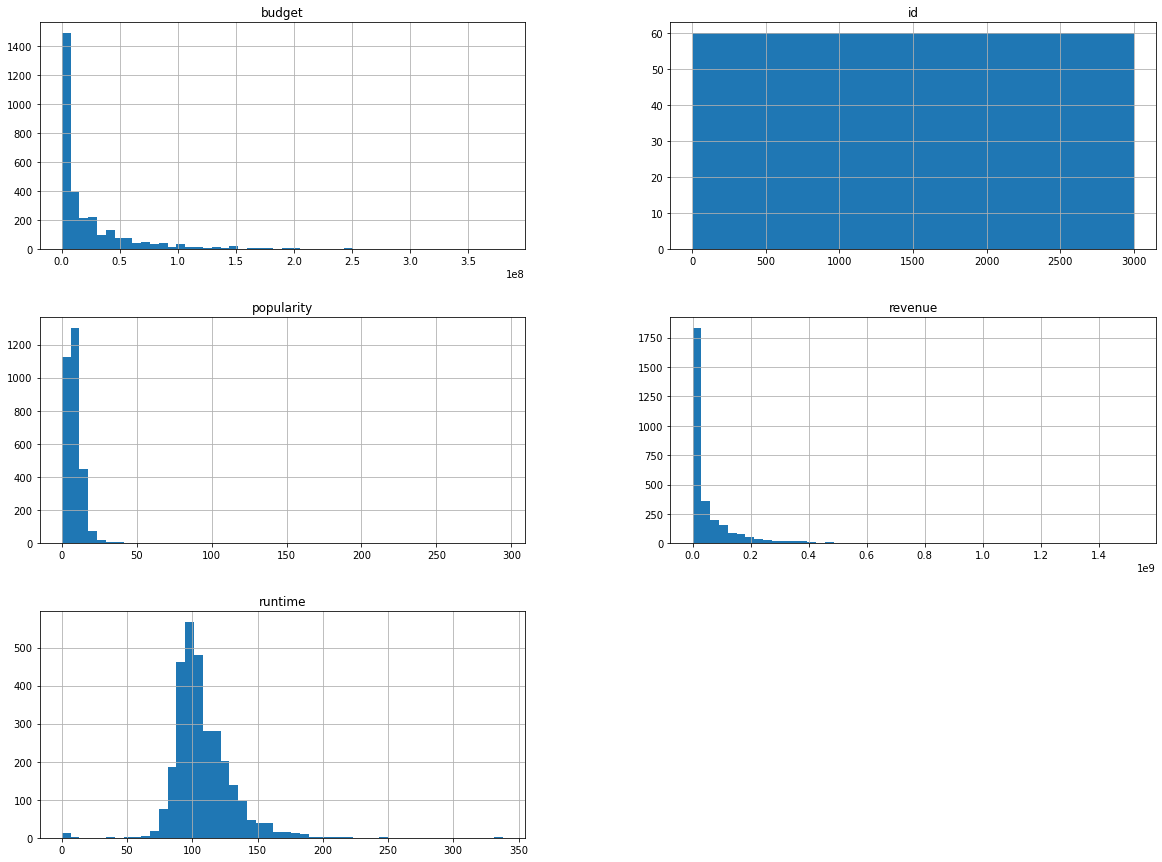

In [46]:
# Histogram for å finne ut mer om treningssettet
train.hist(bins=50, figsize=(20,15))
plt.show()

## Prepare the data to better expose the underlying data patterns to machine learning algorithms

### Data cleaning

#### Fjerner irrelevante kolonner
Fjerner unyttige kolonner for å gjøre settet mindre. Vi fjerner kolonner vi mener ikke er spesielt viktig for "revenue"

In [47]:
labels = train["revenue"].copy()


list_drop = ["id", "homepage", "imdb_id", "original_title", "overview", "poster_path", "tagline", "title", "status"
             , "crew"];

list_drop_test = ["homepage", "imdb_id", "original_title", "overview", "poster_path", "tagline", "title", "status"
             , "crew"];
train = train.drop(list_drop, axis=1)
test = test.drop(list_drop_test, axis=1)
train = train.drop("revenue", axis=1)

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  604 non-null    object 
 1   budget                 3000 non-null   int64  
 2   genres                 2993 non-null   object 
 3   original_language      3000 non-null   object 
 4   popularity             3000 non-null   float64
 5   production_companies   2844 non-null   object 
 6   production_countries   2945 non-null   object 
 7   release_date           3000 non-null   object 
 8   runtime                2998 non-null   float64
 9   spoken_languages       2980 non-null   object 
 10  Keywords               2724 non-null   object 
 11  cast                   2987 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 281.4+ KB


In [49]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4398 non-null   int64  
 1   belongs_to_collection  877 non-null    object 
 2   budget                 4398 non-null   int64  
 3   genres                 4382 non-null   object 
 4   original_language      4398 non-null   object 
 5   popularity             4398 non-null   float64
 6   production_companies   4140 non-null   object 
 7   production_countries   4296 non-null   object 
 8   release_date           4397 non-null   object 
 9   runtime                4394 non-null   float64
 10  spoken_languages       4356 non-null   object 
 11  Keywords               4005 non-null   object 
 12  cast                   4385 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 446.8+ KB


#### Belongs to Collection

Det som virker mest nyttig er om filmen hører til en kolleksjon eller ikke. Dersom filmen har en collection gis det verdi 1, ellers verdi 0.

In [50]:
train["belongs_to_collection"] = np.where(pd.notnull(train["belongs_to_collection"]), 1, 0)
test["belongs_to_collection"] = np.where(pd.notnull(test["belongs_to_collection"]), 1, 0)
train["belongs_to_collection"].head()

0    1
1    1
2    0
3    0
4    0
Name: belongs_to_collection, dtype: int32

#### Fikse strenger

Noen kolonner inneholder lister av strenger. Her har vi kun lyst til å vise frem name.
Lager derfor en funksjon som sorterer strengene slik at vi kun får ut det vesentlige, som i vårt tilfelle er "name".

In [51]:
def fix_strings(s):
    try:
        return ast.literal_eval(s)[0]['name']
    except:
        pass

In [52]:
train.genres = train.genres.apply(fix_strings)
train.production_companies = train.production_companies.apply(fix_strings)
train.production_countries = train.production_countries.apply(fix_strings)
train.spoken_languages = train.spoken_languages.apply(fix_strings)
train.Keywords = train.Keywords.apply(fix_strings)
train.cast = train.cast.apply(fix_strings)

test.genres = test.genres.apply(fix_strings)
test.production_companies = test.production_companies.apply(fix_strings)
test.production_countries = test.production_countries.apply(fix_strings)
test.spoken_languages = test.spoken_languages.apply(fix_strings)
test.Keywords = test.Keywords.apply(fix_strings)
test.cast = test.cast.apply(fix_strings)

Ser nå at kolonenne over nå gir oss kun "name".
Her har vi tatt en snarvei, ettersom funksjonen gjør at kun ett navn kommer (for eksempel på cast, hvor det kan være flere skuespillere)

In [53]:
train.head()

,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,Keywords,cast
0,1,14000000,Comedy,en,6.575393,Paramount Pictures,United States of America,2/20/15,93.0,English,time travel,Rob Corddry
1,1,40000000,Comedy,en,8.248895,Walt Disney Pictures,United States of America,8/6/04,113.0,English,coronation,Anne Hathaway
2,0,3300000,Drama,en,64.299990,Bold Films,United States of America,10/10/14,105.0,English,jazz,Miles Teller
3,0,1200000,Thriller,hi,3.174936,None,India,3/9/12,122.0,English,mystery,Vidya Balan
4,0,0,Action,ko,1.148070,None,South Korea,2/5/09,118.0,한국어/조선말,None,Kim Kang-woo


#### Release date
Denne funksjonen hentet vi fra Kaggle, fra en som hadde gjort prosjektet tidligere.
Funskjonen hjelper oss med å sortere "release_date" til å kun få ut året for utgivning. Dette er enda en snarvei vi tar i prosjektet.
##### Link til prosjektet vi henter koden fra: https://www.kaggle.com/artgor/eda-feature-engineering-and-model-interpretation?fbclid=IwAR3wZWesOpiIi88vXgq5QzQnQVdB8lkbMDF-F3tWp2QwCVcfbIIJBlQH-1U

In [54]:

def fix_date(x):
    year = x.split('/')[2]
    if int(year) <= 19:
        return x[:-2] + '20' + year
    else:
        return x[:-2] + '19' + year

In [55]:
train['release_date'] = train['release_date'].apply(lambda x: fix_date(x))

In [56]:
train['release_date'].mode()

0    9/10/2010
1    9/10/2015
dtype: object


Ettersom "release_date" har en nullverdi, setter vi denne til 09.10.2010. 2010 er medianåret for dette settet.

In [57]:
test.loc[test['release_date'].isnull() == True, 'release_date'] = '9/10/10'
test['release_date'] = test['release_date'].apply(lambda x: fix_date(x))

In [58]:
for index in range(3000):
    train['release_date'][index] = train['release_date'][index][-4:]

<ipython-input-58-fca24e3956b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['release_date'][index] = train['release_date'][index][-4:]


In [59]:
for index in range(4398):
    test['release_date'][index] = test['release_date'][index][-4:]

<ipython-input-59-feacc2dd8ca0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['release_date'][index] = test['release_date'][index][-4:]


For ordensskyld endrer vi navnet fra "release_date" til "release_year" fordi det nå er året vi sorterer filmene på.

In [60]:
train.rename(columns={'release_date': 'release_year'}, inplace=True)
test.rename(columns={'release_date': 'release_year'}, inplace=True)

Kolonnen "release_year" er fortsatt et objekt - endrer denne til int.

In [61]:
train = train.astype({'release_year': int})
test = test.astype({'release_year': int})

In [62]:
train['release_year']

0       2015
1       2004
2       2014
3       2012
4       2009
        ... 
2995    1994
2996    2013
2997    1996
2998    2004
2999    2011
Name: release_year, Length: 3000, dtype: int32

#### Fill missing values
Maskinlæringsalgoritmer kan ikke kjøre med manglende verdier. Tar for oss hver kolonne som har "NaN" verdier og fyller disse med "None", slik at vi på sikt kan kjøre verdiene gjennom en Pipeline.

In [63]:
train['genres'].fillna('None', inplace=True)
train['production_companies'].fillna('None', inplace=True)
train['production_countries'].fillna('None', inplace=True)
train['spoken_languages'].fillna('None', inplace=True)
train['Keywords'].fillna('None', inplace=True)
train['cast'].fillna('None', inplace=True)

test['genres'].fillna('None', inplace=True)
test['production_companies'].fillna('None', inplace=True)
test['production_countries'].fillna('None', inplace=True)
test['spoken_languages'].fillna('None', inplace=True)
test['Keywords'].fillna('None', inplace=True)
test['cast'].fillna('None', inplace=True)

Velger å bruke Simple imputer for å løse dette for de numeriske kolonnene. Tryggest å kjøre SimpleImputer gjennom alle de numeriske kolonnene.

In [64]:
imputer = SimpleImputer(strategy="median")
movies_num = train[['belongs_to_collection', 'budget', 'popularity', 'runtime']]
imputer.fit(movies_num)
imputer.statistics_

array([0.0000000e+00, 8.0000000e+06, 7.3748615e+00, 1.0400000e+02])

### Handling Text and Categorical Attributes
De fleste maskinlæringsalgoritmer foretrekker at alle attributtene er numeriske. Siden 'genres', 'original_language', 'production_companies', 'production_countries', 'release_year', 'spoken_languages', 'Keywords', og 'cast' er teksbasert skal vi nå gjøre de numerisk.

In [65]:
movies_cat = train[['genres', 'original_language', 'production_companies', 'production_countries', 'release_year',
                   'spoken_languages', 'Keywords', 'cast']]

Bruker OneHotEncoder til å gjøre om tekstverdier til numeriske verdier.

In [66]:
encoder = OneHotEncoder()
movies_cat = encoder.fit_transform(movies_cat)
movies_cat

<3000x3978 sparse matrix of type '<class 'numpy.float64'>'
	with 24000 stored elements in Compressed Sparse Row format>

In [67]:
encoder.categories_

[array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
        'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
        'Horror', 'Music', 'Mystery', 'None', 'Romance', 'Science Fiction',
        'TV Movie', 'Thriller', 'War', 'Western'], dtype=object),
 array(['ar', 'bn', 'cn', 'cs', 'da', 'de', 'el', 'en', 'es', 'fa', 'fi',
        'fr', 'he', 'hi', 'hu', 'id', 'it', 'ja', 'ko', 'ml', 'mr', 'nb',
        'nl', 'no', 'pl', 'pt', 'ro', 'ru', 'sr', 'sv', 'ta', 'te', 'tr',
        'ur', 'vi', 'zh'], dtype=object),
 array(['10th Hole Productions', '120dB Films', '1492 Pictures', ...,
        'Роскинопрокат', 'СТВ', 'Фокс'], dtype=object),
 array(['Argentina', 'Australia', 'Austria', 'Bahamas', 'Belgium',
        'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Burkina Faso',
        'Cambodia', 'Canada', 'Chile', 'China', 'Czech Republic',
        'Denmark', 'Ethiopia', 'Finland', 'France', 'Germany', 'Greece',
        'Hong Kong', 'Hungary', 'Iceland', 'India', 

### Feature Scaling
Maskinlæringsalgoritmer fungerer dårlig dersom variasjonen mellom verdiene i de ulike attributtene på treningssettet er store. Derfor lønner det seg å bruke StandardScaler for å skalere ned verdiene

In [68]:
scaler = StandardScaler()
movies_to_scale = train[['belongs_to_collection', 'budget', 'popularity', 'runtime']]
movies_to_scale = scaler.fit_transform(movies_to_scale)

Her ser man resultatet etter man har skalert ned:

In [69]:
movies_to_scale

array([[ 1.99170465, -0.23045256, -0.15599768, -0.67276814],
       [ 1.99170465,  0.47187212, -0.01771439,  0.23291614],
       [-0.50208247, -0.51948618,  4.61384865, -0.12935757],
       ...,
       [-0.50208247,  1.14718432,  0.49736238,  0.54990563],
       [-0.50208247,  0.5258971 ,  0.6000891 , -0.80862078],
       [-0.50208247,  0.33680969,  0.16929745, -0.08407336]])

## Transformation Pipelines


Tidligere i prosjektet har vi nå vist manuelt hvordan man behandler missing values, tekst og kategoriske attributter i tillegg til å skalere ned verdier. Det meste av dette kan vi gjøre i ett ved hjelp av Pipelines.

In [70]:
train_num = train[['belongs_to_collection', 'budget', 'popularity', 'runtime']]

num_pipeline = Pipeline([
    ('num_imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

train_num_tr = num_pipeline.fit_transform(train_num)
train_num_tr

array([[ 1.99170465, -0.23045256, -0.15599768, -0.6728692 ],
       [ 1.99170465,  0.47187212, -0.01771439,  0.23310791],
       [-0.50208247, -0.51948618,  4.61384865, -0.12928293],
       ...,
       [-0.50208247,  1.14718432,  0.49736238,  0.5501999 ],
       [-0.50208247,  0.5258971 ,  0.6000891 , -0.80876577],
       [-0.50208247,  0.33680969,  0.16929745, -0.08398408]])

In [71]:
train_cat = train[['genres', 'original_language', 'production_companies', 'production_countries', 'release_year',
                   'spoken_languages', 'Keywords', 'cast']]

In [72]:
num_attribs = list(train_num)
cat_attribs = list(train_cat)

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(handle_unknown = 'ignore'), cat_attribs),
])

train_prepared = full_pipeline.fit_transform(train)

In [73]:
train_prepared

<3000x3982 sparse matrix of type '<class 'numpy.float64'>'
	with 36000 stored elements in Compressed Sparse Row format>

## Explore many different models and short-list the best ones

### Linear Regression

In [74]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_prepared, labels)

LinearRegression()

In [75]:
some_data = train.iloc[:5]
some_labels = labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lr.predict(some_data_prepared))

Predictions: [12314563.29539771 95149460.75640605 13091803.04566531 15999966.16782279
  3923872.51293214]


In [76]:
print("Labels:", list(some_labels))

Labels: [12314651, 95149435, 13092000, 16000000, 3923970]


In [77]:
from sklearn.model_selection import cross_val_score
lr_scores = cross_val_score(lr, train_prepared, labels, scoring="neg_mean_squared_error", cv=10)
lr_rmse_scores = np.sqrt(-lr_scores)

In [78]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lr_rmse_scores)

Scores: [3.13098716e+08 3.69369339e+08 4.09903907e+08 3.47650650e+08
 2.79840144e+08 3.09503983e+08 3.23627498e+08 2.73833421e+08
 3.81794270e+08 3.76188365e+08]
Mean: 338481029.27484477
Standard deviation: 43312702.65204523


Med et standardavvik på litt over 43 millioner ser vi nok bort fra denne modellen.

### Decision Tree Regressor

In [79]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(train_prepared, labels)
print("Predictions:", dtr.predict(some_data_prepared))

Predictions: [12314651. 95149435. 13092000. 16000000.  3923970.]


In [80]:
print("Labels:", list(some_labels))

Labels: [12314651, 95149435, 13092000, 16000000, 3923970]


In [81]:
dtr_scores = cross_val_score(dtr, train_prepared, labels, scoring="neg_mean_squared_error", cv=10)
dtr_rmse_scores = np.sqrt(-dtr_scores)

display_scores(dtr_rmse_scores)

Scores: [9.80366474e+07 9.28857195e+07 1.14900297e+08 9.85770974e+07
 8.62596515e+07 1.07174025e+08 8.93063891e+07 9.73150799e+07
 9.50402920e+07 9.00923783e+07]
Mean: 96958757.76203297
Standard deviation: 8189049.410031245


Her får vi et standardavvik på 8,1 millioner. Dette er vesentlig bedre enn 43 millioner, som vi fikk på lineær regresjon.

### Random Forest Regressor

In [82]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(train_prepared, labels)
print("Predictions:", rfr.predict(some_data_prepared))

Predictions: [2.88935984e+07 1.02155992e+08 6.28261749e+07 1.20840631e+07
 2.96997511e+06]


In [83]:
print("Labels:", list(some_labels))

Labels: [12314651, 95149435, 13092000, 16000000, 3923970]


In [84]:
rfr_scores = cross_val_score(rfr, train_prepared, labels, scoring="neg_mean_squared_error", cv=10)
rfr_rmse_scores = np.sqrt(-rfr_scores)

display_scores(rfr_rmse_scores)

Scores: [74296597.20530687 72598908.0416541  93137540.2672293  69748961.85771836
 73292803.297431   90880574.75303671 64660120.16800492 77879162.30791241
 80821215.79214734 66261058.34745415]
Mean: 76357694.20378953
Standard deviation: 9082598.588508895


Nå er standardavviket på ca 9 millioner.

## Fine-tune your models and combine them into a great solution
Her prøvde vi grid search med den beste modellen, nemlig Decision Tree Regressor

In [85]:
from sklearn.model_selection import GridSearchCV

param_grid = {"min_samples_split": [10, 20, 40],
             "max_depth": [2, 6, 8],
             "min_samples_leaf": [20, 40, 100], 
             "max_leaf_nodes": [5, 20, 100],
             }

dtr = DecisionTreeRegressor()

grid_search = GridSearchCV(dtr, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(train_prepared, labels);

In [86]:
# Vis parametre for best resultat
grid_search.best_params_

{'max_depth': 8,
 'max_leaf_nodes': 100,
 'min_samples_leaf': 20,
 'min_samples_split': 10}

In [87]:
model = grid_search.best_estimator_
model

DecisionTreeRegressor(max_depth=8, max_leaf_nodes=100, min_samples_leaf=20,
                      min_samples_split=10)

In [88]:
model_scores = cross_val_score(model, train_prepared, labels, scoring="neg_mean_squared_error", cv=10)
model_rmse_scores = np.sqrt(-model_scores)

display_scores(model_rmse_scores)

Scores: [85465454.77457726 79902500.57668033 97384082.70793496 82208500.23612466
 77616615.96872228 97314362.82483612 76787112.40866172 88173749.25545377
 89228075.29647118 76461821.80512194]
Mean: 85054227.58545843
Standard deviation: 7495257.9923306815


Etter å ha kjørt grid search på DTR, får vi det helt klart beste standardavviket på ca 7,5 millioner. Dette blir med andre ord vår modell.

In [89]:
test_prepared = full_pipeline.transform(test)
revenue = model.predict(test_prepared)
revenue

C:\Users\Jon\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "


array([ 3865514.30693069,  3865514.30693069,  6654541.7852349 , ...,
       58863359.04166666, 16806959.76923077,  6909562.5       ])

## Present your solution

Hovedfokuset med dette maskinlæringsprosjektet har vært på deploymentdelen. Derfor har vi tatt noen "snarveier" på veien til en ferdig modell. Vi har blant annet droppet et par kolonner, og i tillegg gjort endringer på dataen i noen kolonner. En konsekvens av disse "snarveiene" er funksjonen som fikser strenger tar kun med én verdi. Hvis vi tar "genres" kolonnen som et eksempel kan filmer ha flere sjangre. Men funksjonen som fikser strenger beholder kun én sjanger.

I dette maskinlæringsprosjektet har vi lært hvordan vi setter maskinlæringsmodeller i drift. I punkt fem undersøkte vi ulike modeller for prosjektet. Ut fra kryssvalidering fikk to modeller ganske god score. Men vi valgte Decision Tree Regressor, ettersom den fungerte best.

I deploymentdelen valgte vi å kun ha input verdier på fire "features": budget, release_year, cast og genres. Disse ble valgt siden vi tenkte disse hadde størst påvirkning på inntekten. Alle de andre "features" får medianen som verdi dersom de er numeriske, og den hyppigste dersom de er kategoriske. Siden de fleste verdiene blir satt til bestemte verdier "bak kulissene" er dette ikke den mest treffsikre modellen. Den har med andre ord noen begrensninger.

## Launch, monitor and maintain your system

Vi har nå laget en webapplikasjon med de featuresene vi synes var viktigst. Uten å vite revenue vi faktisk sammenligner med vet vi ikke hvor nærmt vi er, men vi baserer oss på Kaggle scoren som ble 2,64. Vi har vært i stand til å lage en maskinlæringsmodell som ikke helt enda kan konkurrere med den manuelle vurderingen, men som kan med jevnlig trening bli mer presis.

Hadde datasettet vært et noe vi jevnlig hadde fått inn nye data på, måtte vi (som overskriften sier) overvåket tallene slik at man trener modellen til å bli best mulig. En konsekvens av en så enkel modell vi har publisert er at modellen kan bli underfitted, men vi tror at disse featuresene vil gjøre risikoen mindre for dette. 

En løsning for dette ville selvfølgelig vært å tilrettelegge for å kunne legge inn flere og bedre features. Dette vil øke risikoen for å få en overfitted modell som gjør det bra på nåværende sett, men dårlig på nye data. Det er derfor viktig å overvåke modellen - overvåkning er også viktig for å forhindre at man får inn vilkårlige/gale verdier som i sin helhet kan ha stor innvirkning på resultatet.

Over tid kan for eksempel en faktor påvirke revenue mer enn det den gjør i dag. Etter noe tid må man da gå gjennom settet og kanskje legge til flere features, eller forandre verdien på features man ikke har i webapplikasjonen (medianverdier forandrer seg gjerne etter noe tid). Modeller har en tendens til å "råtne" over tid dersom de ikke på jevnlig basis trenes på nye data.

In [90]:
sampleSubmission.head()

,id,revenue
0,3001,1000000
1,3002,1000000
2,3003,1000000
3,3004,1000000
4,3005,1000000


In [91]:
test.head()

,id,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,release_year,runtime,spoken_languages,Keywords,cast
0,3001,1,0,Adventure,ja,3.851534,None,Japan,2007,90.0,English,pok√©mon,Craig Blair
1,3002,0,88000,Horror,en,3.559789,Woolner Brothers Pictures Inc.,United States of America,1958,65.0,English,revenge,Allison Hayes
2,3003,0,0,Comedy,en,8.085194,Warner Bros.,United States of America,1997,100.0,English,jealousy,Meg Ryan
3,3004,0,6800000,Drama,fr,8.596012,TS Productions,Canada,2010,130.0,Français,prison,Lubna Azabal
4,3005,0,2000000,History,en,3.217680,None,United States of America,2005,92.0,English,usa,Dennis Hopper


In [93]:
submission = pd.DataFrame({'id': test['id'], 'revenue': revenue})

In [94]:
submission.to_csv('submission.csv', index=False)



## Export trained model

Eksporterer modellen vår.

In [97]:
from pathlib import Path
NB_DIR = Path.cwd()
MODEL_DIR = NB_DIR/'..'/'models'

In [98]:
from joblib import dump
dump(full_pipeline, MODEL_DIR/'full_pipeline.joblib', compress=6)

['C:\\Users\\Jon\\OneDrive\\Dokumenter\\Dataingeniør\\5 semester\\DAT158\\DAT158ML-Mandatory-exercise-2\\nbs\\..\\models\\full_pipeline.joblib']